In [1]:
import sys
import math
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# A simple railway marker 

1. Convert image to grayscale
2. Since railway beams are dark, threshold lower image values to remove background noise. (A Canny did not work well because of the discontinious grey-scale values in the rocks, even with  considerable smoothing) The threshold values were determined from histograms of pixel values
3. Smooth out background noise using a median filter
4. Use a Hough line transform to find straight lines in images. Parameters we chosen heuristically. 
5. Determine the mean line which goes through the center of the railway and plot.(Not the best design option but it was quick)

Results are shown below on the two test images.

Note, this is a quick prototype and has not been tested on large datasets

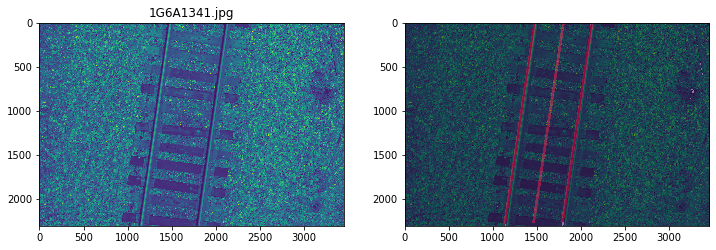

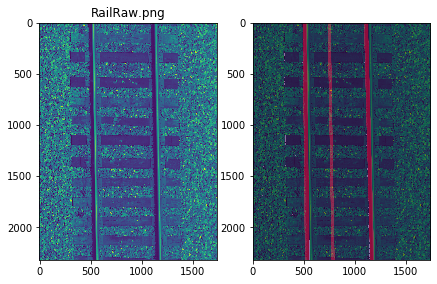

In [21]:
kernel_size = 11

def draw_line(default_file, ax):
    #1. read in file
    src = cv.imread(cv.samples.findFile(default_file), cv.IMREAD_GRAYSCALE)
    #2. Threshold
    ret1, th1 = cv.threshold(src,20,255,cv.THRESH_BINARY_INV)
    
    #3. Smooth to remove background noise
    dst = cv.medianBlur(th1,kernel_size)

    src2 = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
    src_present = np.copy(src)
    
    #4. Hough line transform to determine lines in the image
    linesP = cv.HoughLinesP(dst, 15, 0.5*np.pi / 180, 50, None, 2200, 300)
    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv.line(src2, (l[0], l[1]), (l[2], l[3]), (255,0,0), 30,cv.LINE_AA)
            
    #5. Hough line transform to determine lines in the image
    #Note parameters are determined heuristically
    mean_line = np.mean(linesP,axis=0,dtype=int)[0]
    cv.line(src2, (mean_line[0], mean_line[1]), 
            (mean_line[2], mean_line[3]), (255,0,0), 
            30, cv.LINE_AA)

    ax[0].imshow(src_present)
    ax[1].imshow(src_present)
    ax[1].imshow(src2,alpha=0.4)

   


file = '1G6A1341.jpg'
fig, ax = plt.subplots(1,2,figsize=(12,9))
ax[0].set_title(file)
draw_line(file,ax)


file = 'RailRaw.png'
fig, ax = plt.subplots(1,2,figsize=(7,5))
ax[0].set_title(file)
draw_line(file,ax)



plt.show()